In [29]:
%matplotlib inline

In [30]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
#Loading the dataset
cr_df = pd.read_csv('credit.csv')
cr_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


####About the data
The file consists of historic data from a general bank about the customers taking loan. Some customers are defaulters and others were good customers. Based on the given independent columns we are predicting the target column whether the customer is a defaulter or not.

In [33]:
#Getting the statistical summary of the dataset we loaded
cr_df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [34]:
#To get the info about data types and missing values
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [35]:
#As there are many string values, we are converting those to ordinal data for the model as decision tree in python can take only numerical/ categorical columns
for i in cr_df.columns:
  if cr_df[i].dtype == 'object':
    cr_df[i] = pd.Categorical(cr_df[i]).codes #replacing string with integer

In [36]:
#checking the data types now
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int8 
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int8 
 3   purpose               1000 non-null   int8 
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int8 
 6   employment_duration   1000 non-null   int8 
 7   percent_of_income     1000 non-null   int64
 8   years_at_residence    1000 non-null   int64
 9   age                   1000 non-null   int64
 10  other_credit          1000 non-null   int8 
 11  housing               1000 non-null   int8 
 12  existing_loans_count  1000 non-null   int64
 13  job                   1000 non-null   int8 
 14  dependents            1000 non-null   int64
 15  phone                 1000 non-null   int8 
 16  default

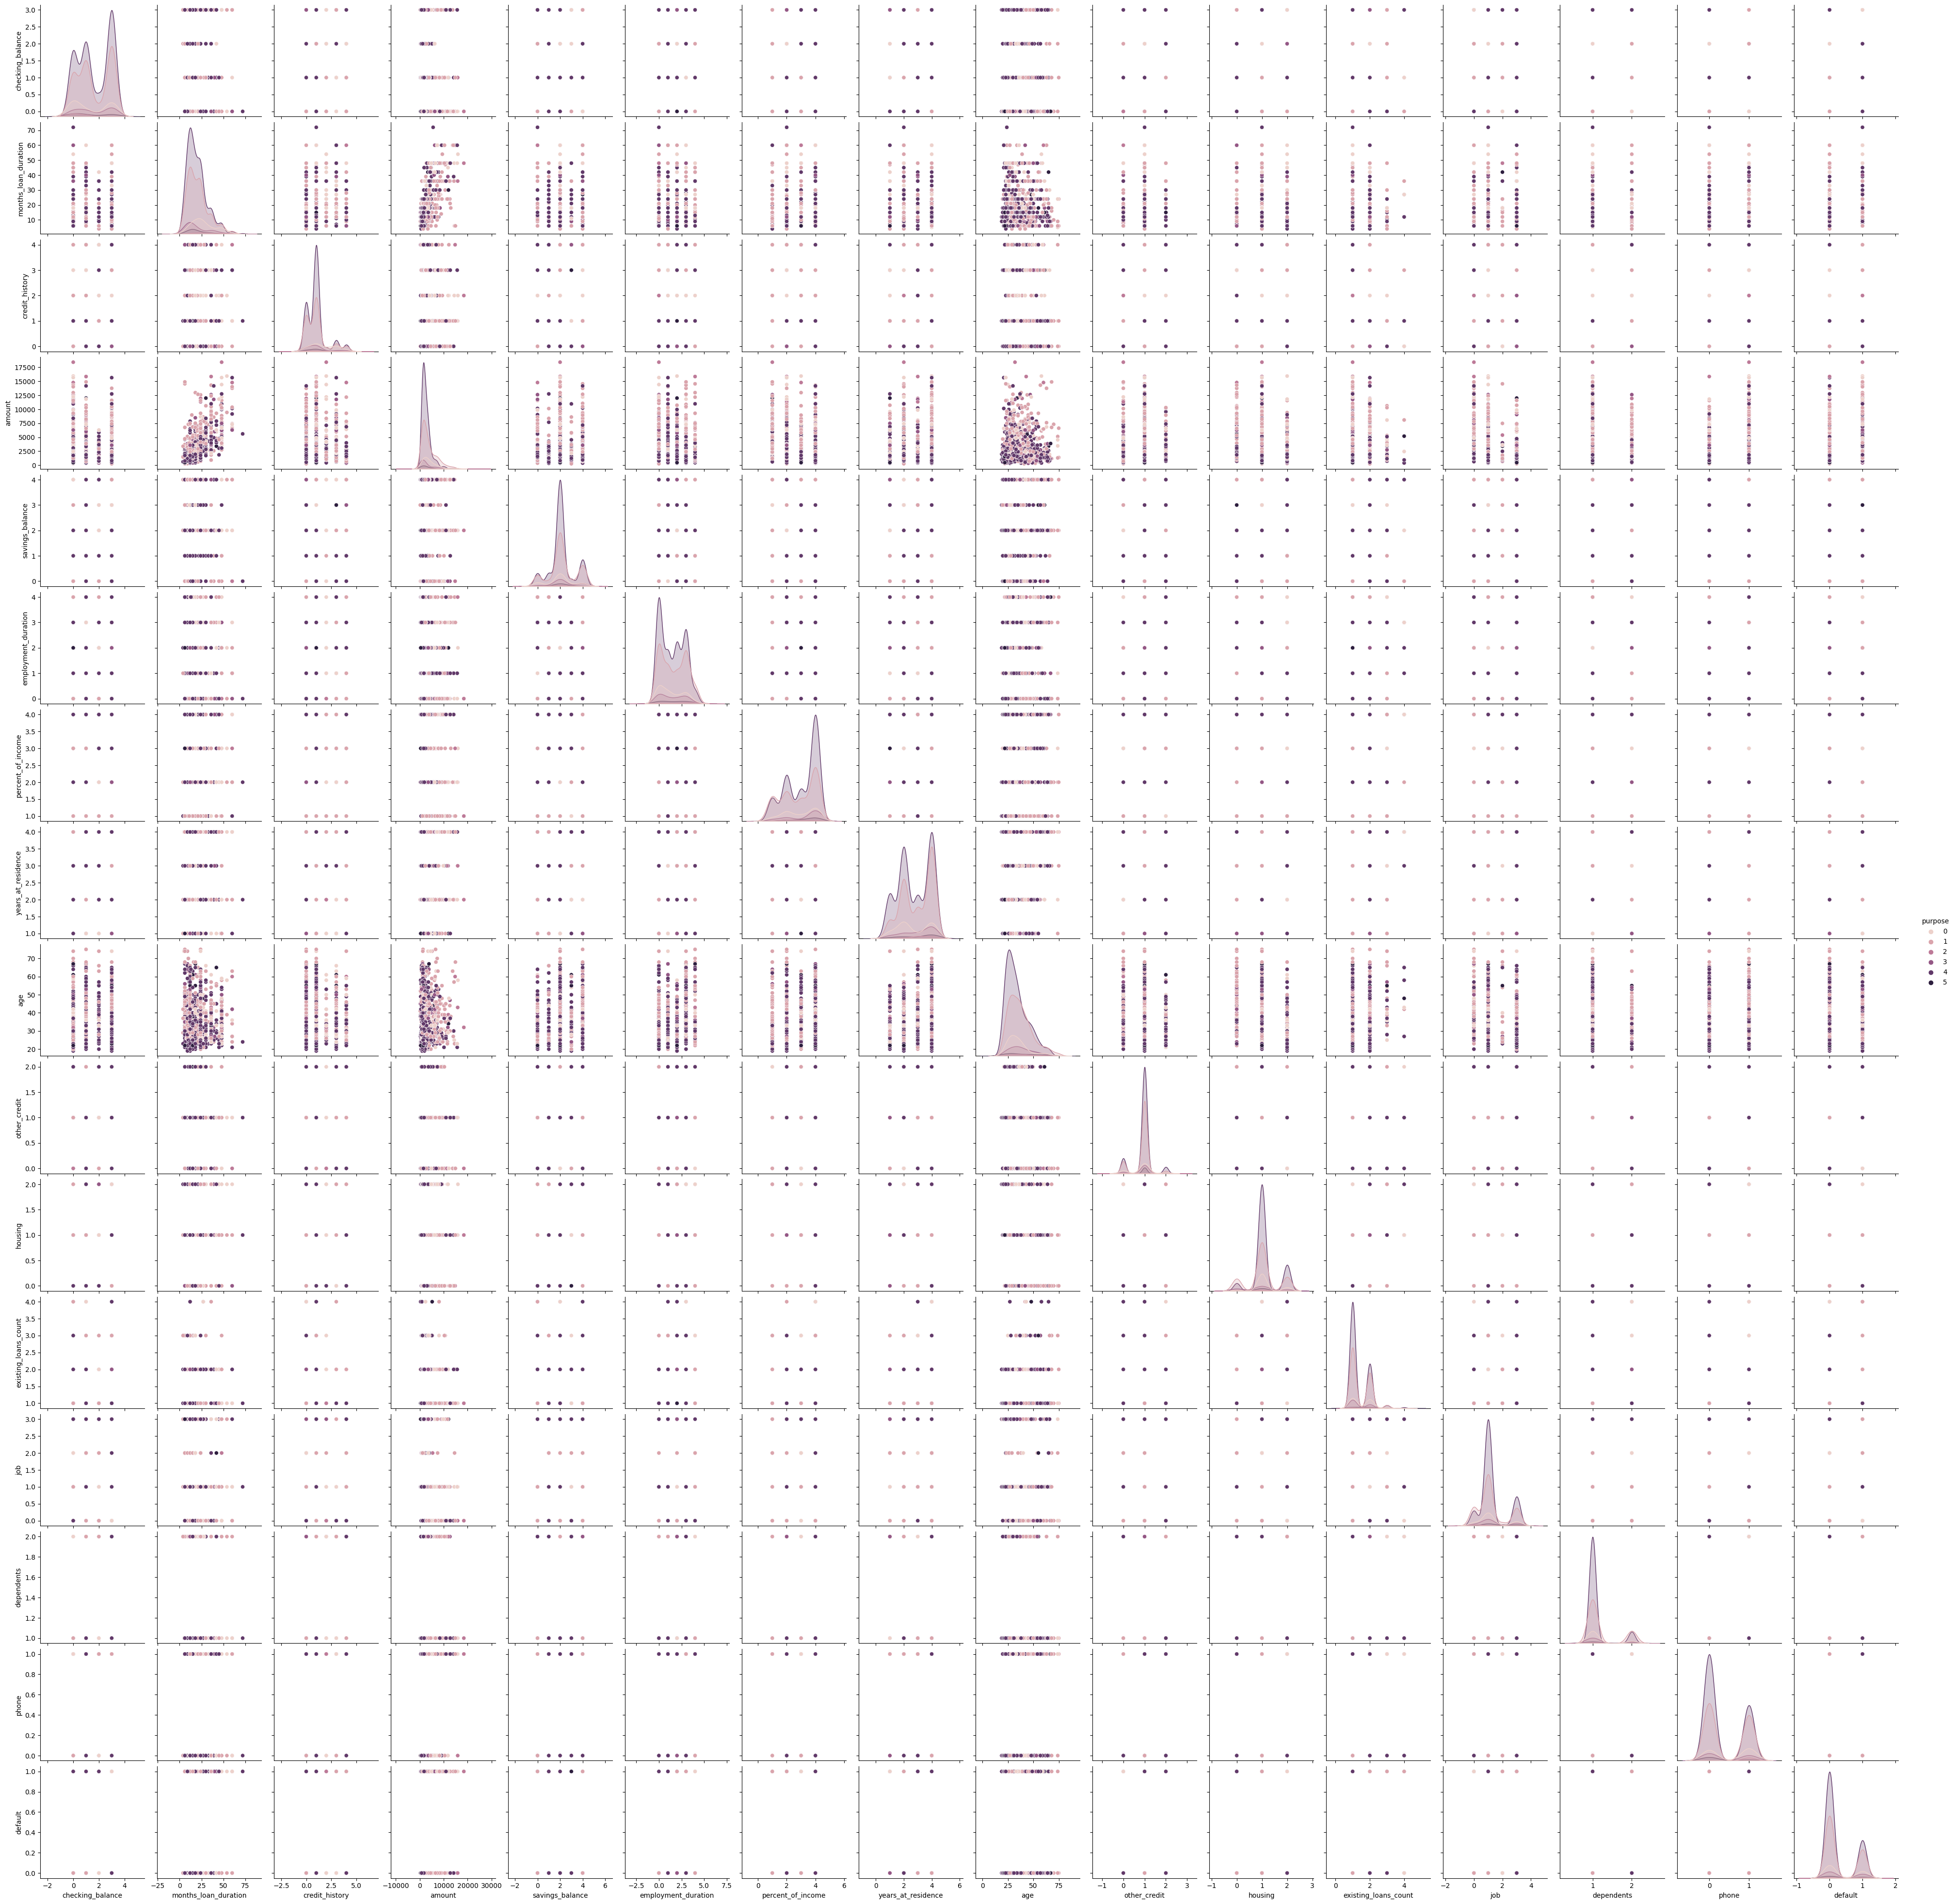

In [37]:
#Analysing the distribution using pairplot in sns
sns.pairplot(cr_df, hue = 'purpose')

In [38]:
col_labels = list(cr_df.columns)

In [39]:
#Dividing the data into dependent and independent variables
X = cr_df.iloc[:,0:-1]
X.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone
0,1,6,0,4,1169,4,3,4,4,67,1,1,2,1,1,1
1,0,48,1,4,5951,2,0,2,2,22,1,1,1,1,1,0
2,3,12,0,3,2096,2,1,2,3,49,1,1,1,3,2,0
3,1,42,1,4,7882,2,1,2,4,45,1,0,1,1,2,0
4,1,24,3,1,4870,2,0,3,4,53,1,0,2,1,2,0


In [40]:
y=cr_df.iloc[:,-1]
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int8

In [41]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

In [42]:
#invoking the decision tree classifier using entropy function, other option could be gini index
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [43]:
#To see the model importances which can help in feature engineering
model.feature_importances_

array([0.13361984, 0.08225583, 0.06262153, 0.06291898, 0.19365887,
       0.07841791, 0.04412194, 0.02763572, 0.04160856, 0.11962538,
       0.05422293, 0.01643692, 0.02051678, 0.02625991, 0.02616782,
       0.00991109])

In [44]:
model.score(X_train, y_train)

1.0

In [45]:
model.score(X_test,y_test)

0.66

In [46]:
#We can see that the training data is overly fit with 100% accuracy and the model cannot generalise to the test data as the accuracy of the test data is only 65%
metrics.confusion_matrix(y_test, model.predict(X_test))

array([[162,  52],
       [ 50,  36]])

In [47]:
#There are many regularization techniques but we are using the max depth method and limiting it to 5. % is chooses after evaluaiting differnent number of levels
reg_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
reg_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [48]:
reg_model.score(X_train, y_train)

0.7885714285714286

In [49]:
reg_model.score(X_test, y_test)

0.7466666666666667

In [56]:
metrics.confusion_matrix(y_test, reg_model.predict(X_test))

array([[195,  19],
       [ 57,  29]])

In [50]:
#so the regularized decision tree is performing well on the test data compared to the non regularized one

In [51]:
#using ensemble methods and checking the performance for the same
from sklearn.ensemble import BaggingClassifier
bgcl_model = BaggingClassifier(n_estimators = 50, max_samples = 0.8, oob_score = True)
bgcl_model.fit(X,y)
bgcl_model.oob_score_

0.751

In [52]:
#oob score is for unseen data which didnt went into the samplings, just checking the model's accuracy on train and test data
bgcl_model.score(X_train, y_train)

0.99

In [53]:
bgcl_model.score(X_test, y_test)

0.9966666666666667

In [58]:
metrics.confusion_matrix(y_test, bgcl_model.predict(X_test))

array([[213,   1],
       [  0,  86]])

In [54]:
#As we can see that the accuracy has been significantly increased when compared to normal and regularised model in the test data using the ensemble technique baggin. Performing boosting now so to check and compare its performance

In [60]:
from sklearn.ensemble import AdaBoostClassifier
adcl_model = AdaBoostClassifier(n_estimators = 50)
adcl_model.fit(X,y)

AdaBoostClassifier()

In [61]:
adcl_model.score(X_train, y_train)

0.7985714285714286

In [62]:
adcl_model.score(X_test, y_test)

0.79

In [63]:
metrics.confusion_matrix(y_test, adcl_model.predict(X_test))

array([[193,  21],
       [ 42,  44]])

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl_model = GradientBoostingClassifier(n_estimators=50)
gbcl_model.fit(X,y)

GradientBoostingClassifier(n_estimators=50)

In [65]:
gbcl_model.score(X_train, y_train)

0.8342857142857143

In [66]:
gbcl_model.score(X_test, y_test)

0.83

In [67]:
metrics.confusion_matrix(y_test, gbcl_model.predict(X_test))

array([[203,  11],
       [ 40,  46]])

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfcl_model = RandomForestClassifier(n_estimators = 6)
rfcl_model.fit(X,y)

RandomForestClassifier(n_estimators=6)

In [76]:
rfcl_model.score(X_train, y_train)

0.9657142857142857

In [77]:
rfcl_model.score(X_test, y_test)

0.9433333333333334

In [78]:
metrics.confusion_matrix(y_test, rfcl_model.predict(X_test))

array([[213,   1],
       [ 16,  70]])

In [72]:
import xgboost as xgb
xgcl_model = xgb.XGBClassifier()
xgcl_model.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [73]:
xgcl_model.score(X_train, y_train)

1.0

In [74]:
xgcl_model.score(X_test, y_test)

1.0

In [75]:
metrics.confusion_matrix(y_test, xgcl_model.predict(X_test))

array([[214,   0],
       [  0,  86]])

So we can see that XGboost done really well followed by Bagging, Randomforest, Gradientboost, Adaboost, Regularised simple model and simple model.